In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=ed34057c1299051f8509b576b6292ad86efb060b00333ed254aa44d4cb1ba9b7
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline

##DOWNLOADING OF THE STOCKS

In [ ]:
stocks=['HDFC.NS','ASHOKLEY.NS','BAJFINANCE.NS','BRITANNIA.NS','WIPRO.NS']

In [ ]:
df=yf.download(stocks,start='2017-01-01',end='2018-12-31',progress=False)['Adj Close']
df.sort_index(inplace=True)
df

,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,HDFC.NS,WIPRO.NS
Date,,,,,
2017-01-02,69.582146,861.430481,1337.766113,1135.349609,173.894119
2017-01-03,69.625099,875.242310,1331.185059,1132.457764,172.216217
2017-01-04,72.030403,863.262268,1321.985352,1130.685303,175.387634
2017-01-05,72.116310,890.836365,1328.195679,1135.442749,177.157745
2017-01-06,73.276009,869.747314,1341.705566,1140.247192,173.304092
...,...,...,...,...,...
2018-12-21,95.351524,2576.620605,2942.697998,1857.150269,239.388046
2018-12-24,94.672699,2550.419189,2924.541016,1812.880249,242.806793
2018-12-26,94.039139,2552.905273,2913.599365,1842.615967,242.398041


In [ ]:
returns=df.pct_change()
returns

,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,HDFC.NS,WIPRO.NS
Date,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.000617,0.016034,-0.004919,-0.002547,-0.009649
2017-01-04,0.034547,-0.013688,-0.006911,-0.001565,0.018415
2017-01-05,0.001193,0.031942,0.004698,0.004208,0.010093
2017-01-06,0.016081,-0.023673,0.010172,0.004231,-0.021753
...,...,...,...,...,...
2018-12-21,-0.007537,-0.000058,-0.016100,-0.013217,-0.033458
2018-12-24,-0.007119,-0.010169,-0.006170,-0.023838,0.014281
2018-12-26,-0.006692,0.000975,-0.003741,0.016402,-0.001683


In [ ]:
mean_daily_returns=returns.mean()
mean_daily_returns

ASHOKLEY.NS      0.000825
BAJFINANCE.NS    0.002478
BRITANNIA.NS     0.001672
HDFC.NS          0.001127
WIPRO.NS         0.000783
dtype: float64

In [ ]:
cov_matrix=returns.cov()
cov_matrix

,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,HDFC.NS,WIPRO.NS
ASHOKLEY.NS,0.000466,0.000124,0.000057,0.000046,0.000010
BAJFINANCE.NS,0.000124,0.000435,0.000072,0.000097,0.000015
BRITANNIA.NS,0.000057,0.000072,0.000166,0.000043,0.000015
HDFC.NS,0.000046,0.000097,0.000043,0.000188,0.000009
WIPRO.NS,0.000010,0.000015,0.000015,0.000009,0.000169


In [ ]:
num_portfolios = 30000
results = np.zeros((3+len(stocks),num_portfolios))

##OPTIMIZATION OF THE WEIGHTS

In [ ]:
for i in range(num_portfolios):
    
    weights = np.array(np.random.random(5))
    
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
results_frame

,ret,stdev,sharpe,HDFC.NS,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,WIPRO.NS
0,0.323575,0.173303,1.867110,0.323267,0.208502,0.126435,0.062115,0.279680
1,0.294790,0.177718,1.658755,0.353372,0.190896,0.011843,0.109282,0.334607
2,0.301295,0.232484,1.295979,0.580803,0.176401,0.075750,0.062934,0.104112
3,0.400947,0.188389,2.128300,0.254180,0.293936,0.271161,0.168552,0.012172
4,0.394826,0.172113,2.293995,0.080911,0.302500,0.164934,0.351655,0.100000
...,...,...,...,...,...,...,...,...
29995,0.313273,0.142825,2.193406,0.126244,0.049673,0.267129,0.387212,0.169742
29996,0.312993,0.161658,1.936137,0.130253,0.139765,0.041509,0.522765,0.165709
29997,0.347266,0.140367,2.473981,0.059718,0.178140,0.259457,0.173680,0.329005
29998,0.309638,0.140845,2.198426,0.096871,0.075764,0.338608,0.034693,0.454064


In [ ]:
max_sharpe_point = results_frame.iloc[results_frame['sharpe'].idxmax()]
max_sharpe_point

ret              0.406164
stdev            0.155546
sharpe           2.611207
HDFC.NS          0.002968
ASHOKLEY.NS      0.235748
BAJFINANCE.NS    0.416166
BRITANNIA.NS     0.171361
WIPRO.NS         0.173757
Name: 2093, dtype: float64

In [ ]:

min_vol_point = results_frame.iloc[results_frame['stdev'].idxmin()]
min_vol_point

ret              0.284990
stdev            0.132058
sharpe           2.158060
HDFC.NS          0.073377
ASHOKLEY.NS      0.008069
BAJFINANCE.NS    0.266623
BRITANNIA.NS     0.273349
WIPRO.NS         0.378583
Name: 23076, dtype: float64

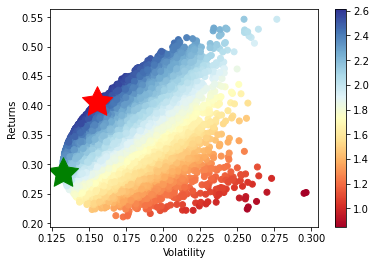

In [ ]:

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_point[1],max_sharpe_point[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_point[1],min_vol_point[0],marker=(5,1,0),color='g',s=1000)

##TESTING THE WEIGHTS FOR THE FOLLOWING YEAR

In [ ]:
test_df=yf.download(stocks,start='2019-01-01',end='2020-12-31',progress=False)['Adj Close']
test_df.sort_index(inplace=True)
test_df

,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,HDFC.NS,WIPRO.NS
Date,,,,,
2019-01-01,92.772011,2641.850586,2926.899170,1914.715698,242.769653
2019-01-02,90.464027,2599.291992,2939.915527,1887.696167,241.952103
2019-01-03,88.834862,2571.599121,2957.883789,1845.951782,241.914948
2019-01-04,87.612984,2561.506592,2945.433350,1880.024048,241.134567
2019-01-07,84.580933,2539.183105,2965.335938,1880.309937,240.985947
...,...,...,...,...,...
2020-12-23,94.267601,5080.690430,3553.139893,2381.301758,384.685150
2020-12-24,94.317116,5176.535156,3546.181396,2432.929932,381.342682
2020-12-28,94.366631,5195.704590,3531.774170,2454.037354,382.041077


In [ ]:
test_returns=test_df.pct_change()
test_mean_daily_returns=test_returns.mean()
test_cov_matrix=test_returns.cov()
test_weights=[max_sharpe_point[3],max_sharpe_point[4],max_sharpe_point[5],max_sharpe_point[6],max_sharpe_point[7]]
test_weights=np.array(test_weights)
test_weights

array([0.00296844, 0.23574786, 0.41616554, 0.1713615 , 0.17375666])

In [ ]:
test_portfolio_return = np.sum(mean_daily_returns * test_weights) * 252
test_portfolio_std_dev = np.sqrt(np.dot(test_weights.T,np.dot(test_cov_matrix, test_weights))) * np.sqrt(252)
print('test return is '+str(test_portfolio_return))
print('test std dev is '+str(test_portfolio_std_dev))   

test return is 0.40616405689331975
test std dev is 0.27813264704981777


In [ ]:
test_sharpe_ratio=test_portfolio_return/test_portfolio_std_dev
print('test sharpe ratio is '+str(test_sharpe_ratio))

test sharpe ratio is 1.460324996729239


So on testing the portfolio weights on the following year, we see a good sharpe ratio of 1.46.

##CHOOSING OF THE STOCKS:

So basically what i did is I selected 5 stocks on a total . Of which i chose each stock from a different unique sector. so basically the 5 stocks belong to 5 digfferent sectors. The reason behind this is it increases the diversification and decreases the correlation between the individual stocks as they arent from the same sector.

##IMPACT OF INCREASING HE NUMBER OF STOCKS

As the number of securities added to a portfolio increases, the standard deviation of the portfolio becomes smaller and smaller. Hence an investor can make the portfolio risk arbitrarily small by including a large number of securities with negative or zero correlation in the portfolio.

##Why are calculating the weights by optimization and not giving equal weightage to every stock?


So suppose if all the stocks are given equal weightage , then the overall portfolio is dependent equally on each individual stock.So the risk of all the individual stocks have the same impact on the portfolio. whereas by calculating the weights by optimization results in assaigning weights in such a way that the portfolio return increases and the std deviation decreases.
 

##Optimization techniques  used by Mutual Funds currently

An optimization technique used by the mutual funds is mean-variance optimization.

##Parameters used for checking the accuracy

I used return percentage and the standard devaiation(volatality) for checking the accuracy. I aslo used the sharpe ratio.